### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?



> ### Target var / y = **logerror** (difference between sales price and estimated price)

> ### logerror=log(Zestimate)−log(SalePrice)




### 2. Answer those questions through a mix of statistical tests and visualizations.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from env import host, user, password 
import os

import wrangle

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# default pandas decimal number display format
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = wrangle.wrangle_zillow()
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
0,10711855,2.00,3.00,8.00,2107.00,6037.00,34222559.00,-118617387.00,9158.00,60371132.32,...,1972.00,249655.00,624139.00,2016.00,374484.00,7659.36,-0.01,2017-07-07,Central,Los_Angeles
1,10711877,2.00,4.00,8.00,1882.00,6037.00,34220261.00,-118616409.00,9035.00,60371132.32,...,1972.00,253000.00,660000.00,2016.00,407000.00,8123.91,0.02,2017-08-29,Central,Los_Angeles
2,10711888,2.00,4.00,8.00,1882.00,6037.00,34222491.00,-118616854.00,9800.00,60371132.32,...,1972.00,257591.00,542923.00,2016.00,285332.00,6673.24,0.08,2017-04-04,Central,Los_Angeles
3,10711910,2.00,3.00,8.00,1477.00,6037.00,34221864.00,-118615739.00,11285.00,60371132.32,...,1960.00,57968.00,78031.00,2016.00,20063.00,1116.46,-0.04,2017-03-17,Central,Los_Angeles
4,10711923,2.00,4.00,8.00,1918.00,6037.00,34220619.00,-118615253.00,11239.00,60371132.32,...,1960.00,167869.00,415459.00,2016.00,247590.00,5239.85,-0.01,2017-03-24,Central,Los_Angeles


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69730 entries, 0 to 77549
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      69730 non-null  int64  
 1   bathroomcnt                   69730 non-null  float64
 2   bedroomcnt                    69730 non-null  float64
 3   buildingqualitytypeid         69730 non-null  float64
 4   calculatedfinishedsquarefeet  69730 non-null  float64
 5   fips                          69730 non-null  float64
 6   latitude                      69730 non-null  float64
 7   longitude                     69730 non-null  float64
 8   lotsizesquarefeet             69730 non-null  float64
 9   rawcensustractandblock        69730 non-null  float64
 10  regionidcity                  69730 non-null  float64
 11  regionidcounty                69730 non-null  float64
 12  regionidzip                   69730 non-null  float64
 13  r

In [4]:
#split data
def split(df):
    '''
    takes in a DataFrame and
    returns train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

In [5]:
train, validate, test = split(df)

In [6]:
#check split datasets
print('overall shape of dataframe:', df.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

#work w/ training data for data exploration
train.head()

overall shape of dataframe: (69730, 25)
train: (39048, 25)
validate: (16736, 25)
test: (13946, 25)


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
24367,11769189,2.00,4.00,5.00,1124.00,6037.00,34006378.00,-118251866.00,5102.00,60372282.20,...,1911.00,28248.00,65538.00,2016.00,37290.00,4098.72,0.06,2017-01-19,Floor/Wall,Los_Angeles
13187,11214573,2.00,4.00,8.00,2418.00,6037.00,34577930.00,-118022815.00,6999.00,60379107.05,...,2005.00,126184.00,157726.00,2016.00,31542.00,3302.59,-0.01,2017-03-30,Central,Los_Angeles
2687,10810570,3.00,3.00,8.00,1920.00,6037.00,34150648.00,-118594405.00,6159.00,60371380.00,...,1963.00,203794.00,543297.00,2016.00,339503.00,6615.05,-0.04,2017-02-01,Central,Los_Angeles
43357,12739068,2.00,3.00,6.00,1540.00,6037.00,33916099.00,-118015323.00,6386.00,60375040.01,...,1959.00,51125.00,83614.00,2016.00,32489.00,1339.32,0.01,2017-08-24,Central,Los_Angeles
31528,12144843,3.00,3.00,8.00,1721.00,6037.00,34111932.00,-118050371.00,10845.00,60374316.00,...,1958.00,61897.00,101015.00,2016.00,39118.00,1369.10,0.05,2017-05-25,Central,Los_Angeles


In [7]:
#set up X inputs and y target variable for each split 
X_train = train.drop(columns=['logerror'])
y_train = train.logerror

X_validate = validate.drop(columns=['logerror'])
y_validate = validate.logerror

X_test = test.drop(columns=['logerror'])
y_test = test.logerror

In [8]:
#scale data
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    makes, fits, and uses/transforms the data,
    
    Returns X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """

    #make and fit
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)

    #use and turn numpy arrays into dataframes
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [9]:
#not going to explore on scaled data, 
#but it is important that the data is scaled before moving into clustering
#make sure to have numeric data in order to scale

#X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)

#X_train_scaled.head()

### Question 1: Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

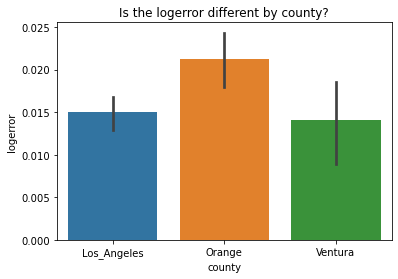

In [11]:
sns.barplot(data = train, x = 'county', y = 'logerror')
plt.title("Is the logerror different by county?")
plt.show()

#### Takeaways
- 
- 


In [12]:
#T-test: logerror and counties
null_hypothesis = "there is no difference in logerror between counties."
alternative_hypothesis = "there is a difference in logerror between counties."
confidence_level = .95
alpha = 1 - confidence_level

la_county = train[train.fips  == 6037].logerror
other_counties = train[train.fips != 6037].logerror

t, p = stats.ttest_ind(la_county, other_counties)


if p < alpha:
    print("We reject the null hypothesis.")
    print("We can move forward with the alternative hypothesis:", alternative_hypothesis)

else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

We reject the null hypothesis.
We can move forward with the alternative hypothesis: there is a difference in logerror between counties.


#### Takeaways
- 
- 


### Question 2: Is there a correlation between square footage of a home and logerror?

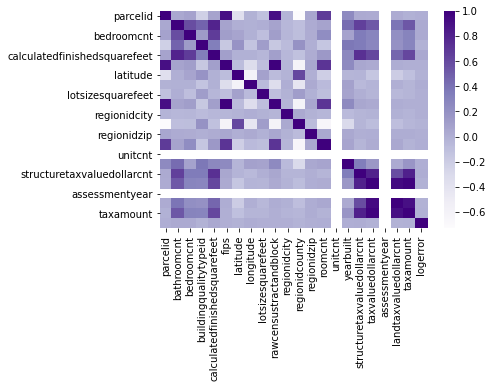

In [37]:
#exploring correlation using heatmap
sns.heatmap(train.corr(), cmap='Purples')

plt.show()

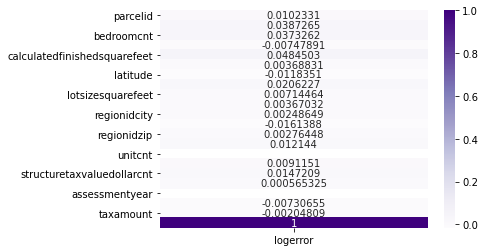

In [40]:
corrMatrix = train.corr()

htmp = pd.DataFrame(corrMatrix['logerror'],
              index=corrMatrix.index)

sns.heatmap(htmp, annot=True, fmt="g", cmap='Purples')

plt.show()

#### Takeaways

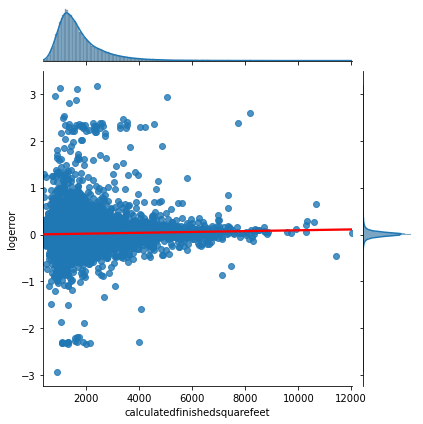

In [35]:
g = sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", data=train, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)

#### Takeaways
- 
- 


In [15]:
#Correlation Test: logerror and square feet
null_hypothesis = "there is no correlation between logerror and square footage of a home."
alternative_hypothesis = "there is a correlation between logerror and square footage of a home."
confidence_level = .95
alpha = 1 - confidence_level

#Use pearsonr function
corr, p = stats.pearsonr(train.logerror, train.calculatedfinishedsquarefeet)


if p < alpha:
    print("We reject the null hypothesis.")
    print("We can move forward with the alternative hypothesis:", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

We reject the null hypothesis.
We can move forward with the alternative hypothesis: there is a correlation between logerror and square footage of a home.


#### Takeaways
- 
- 


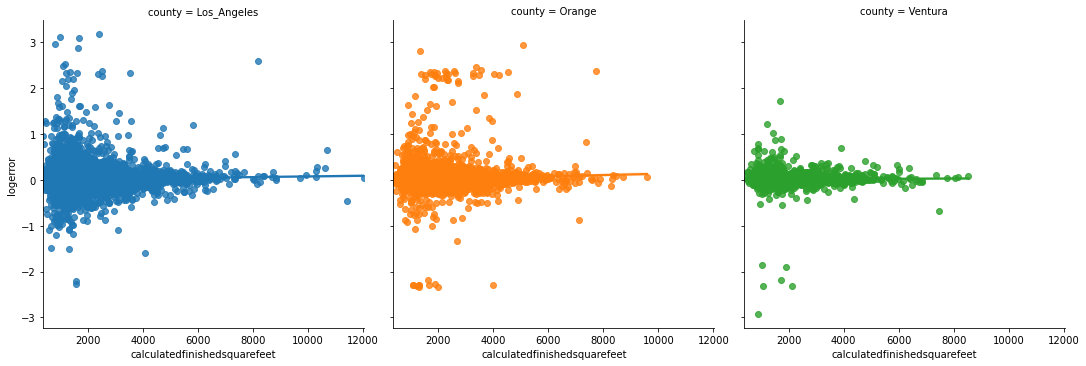

In [14]:
#Visualize how square footage influences the logerror by county
sns.lmplot(data=train, 
           x='calculatedfinishedsquarefeet', 
           y='logerror', 
           hue = 'county', 
           col = 'county', 
           col_wrap=3)

plt.show()

#### Takeaways
- 
- 


### Question 3: Is there a relationship between tax value and logerror?

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

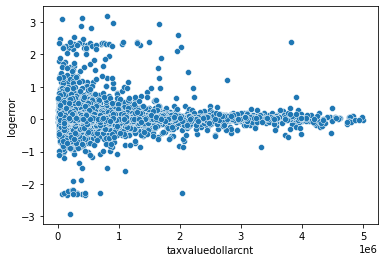

In [16]:
sns.scatterplot(x = 'taxvaluedollarcnt', y = 'logerror', data = train)

#### Takeaways
- 
- 


In [17]:
#Correlation Test: tax value and logerror
null_hypothesis = "there is no correlation between tax value and logerror."
alternative_hypothesis = "there is a correlation between tax value and logerror."
confidence_level = .95
alpha = 1 - confidence_level

#Use pearsonr function
corr, p = stats.pearsonr(train.taxvaluedollarcnt, train.logerror)


if p < alpha:
    print("We reject the null hypothesis.")
    print("We can move forward with the alternative hypothesis:", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

We fail to reject the null hypothesis
Not enough evidence to support there is a correlation between tax value and logerror.


#### Takeaways
- 
- 


### Question 4: What does logerror look like over time?  

In [18]:
years = pd.DataFrame(train.yearbuilt.value_counts().sort_index())
years.head()

,yearbuilt
1878.00,1
1882.00,1
1885.00,2
1887.00,2
1888.00,2


In [19]:
years.tail()

,yearbuilt
2012.00,111
2013.00,160
2014.00,133
2015.00,37
2016.00,1


<AxesSubplot:xlabel='yearbuilt', ylabel='logerror'>

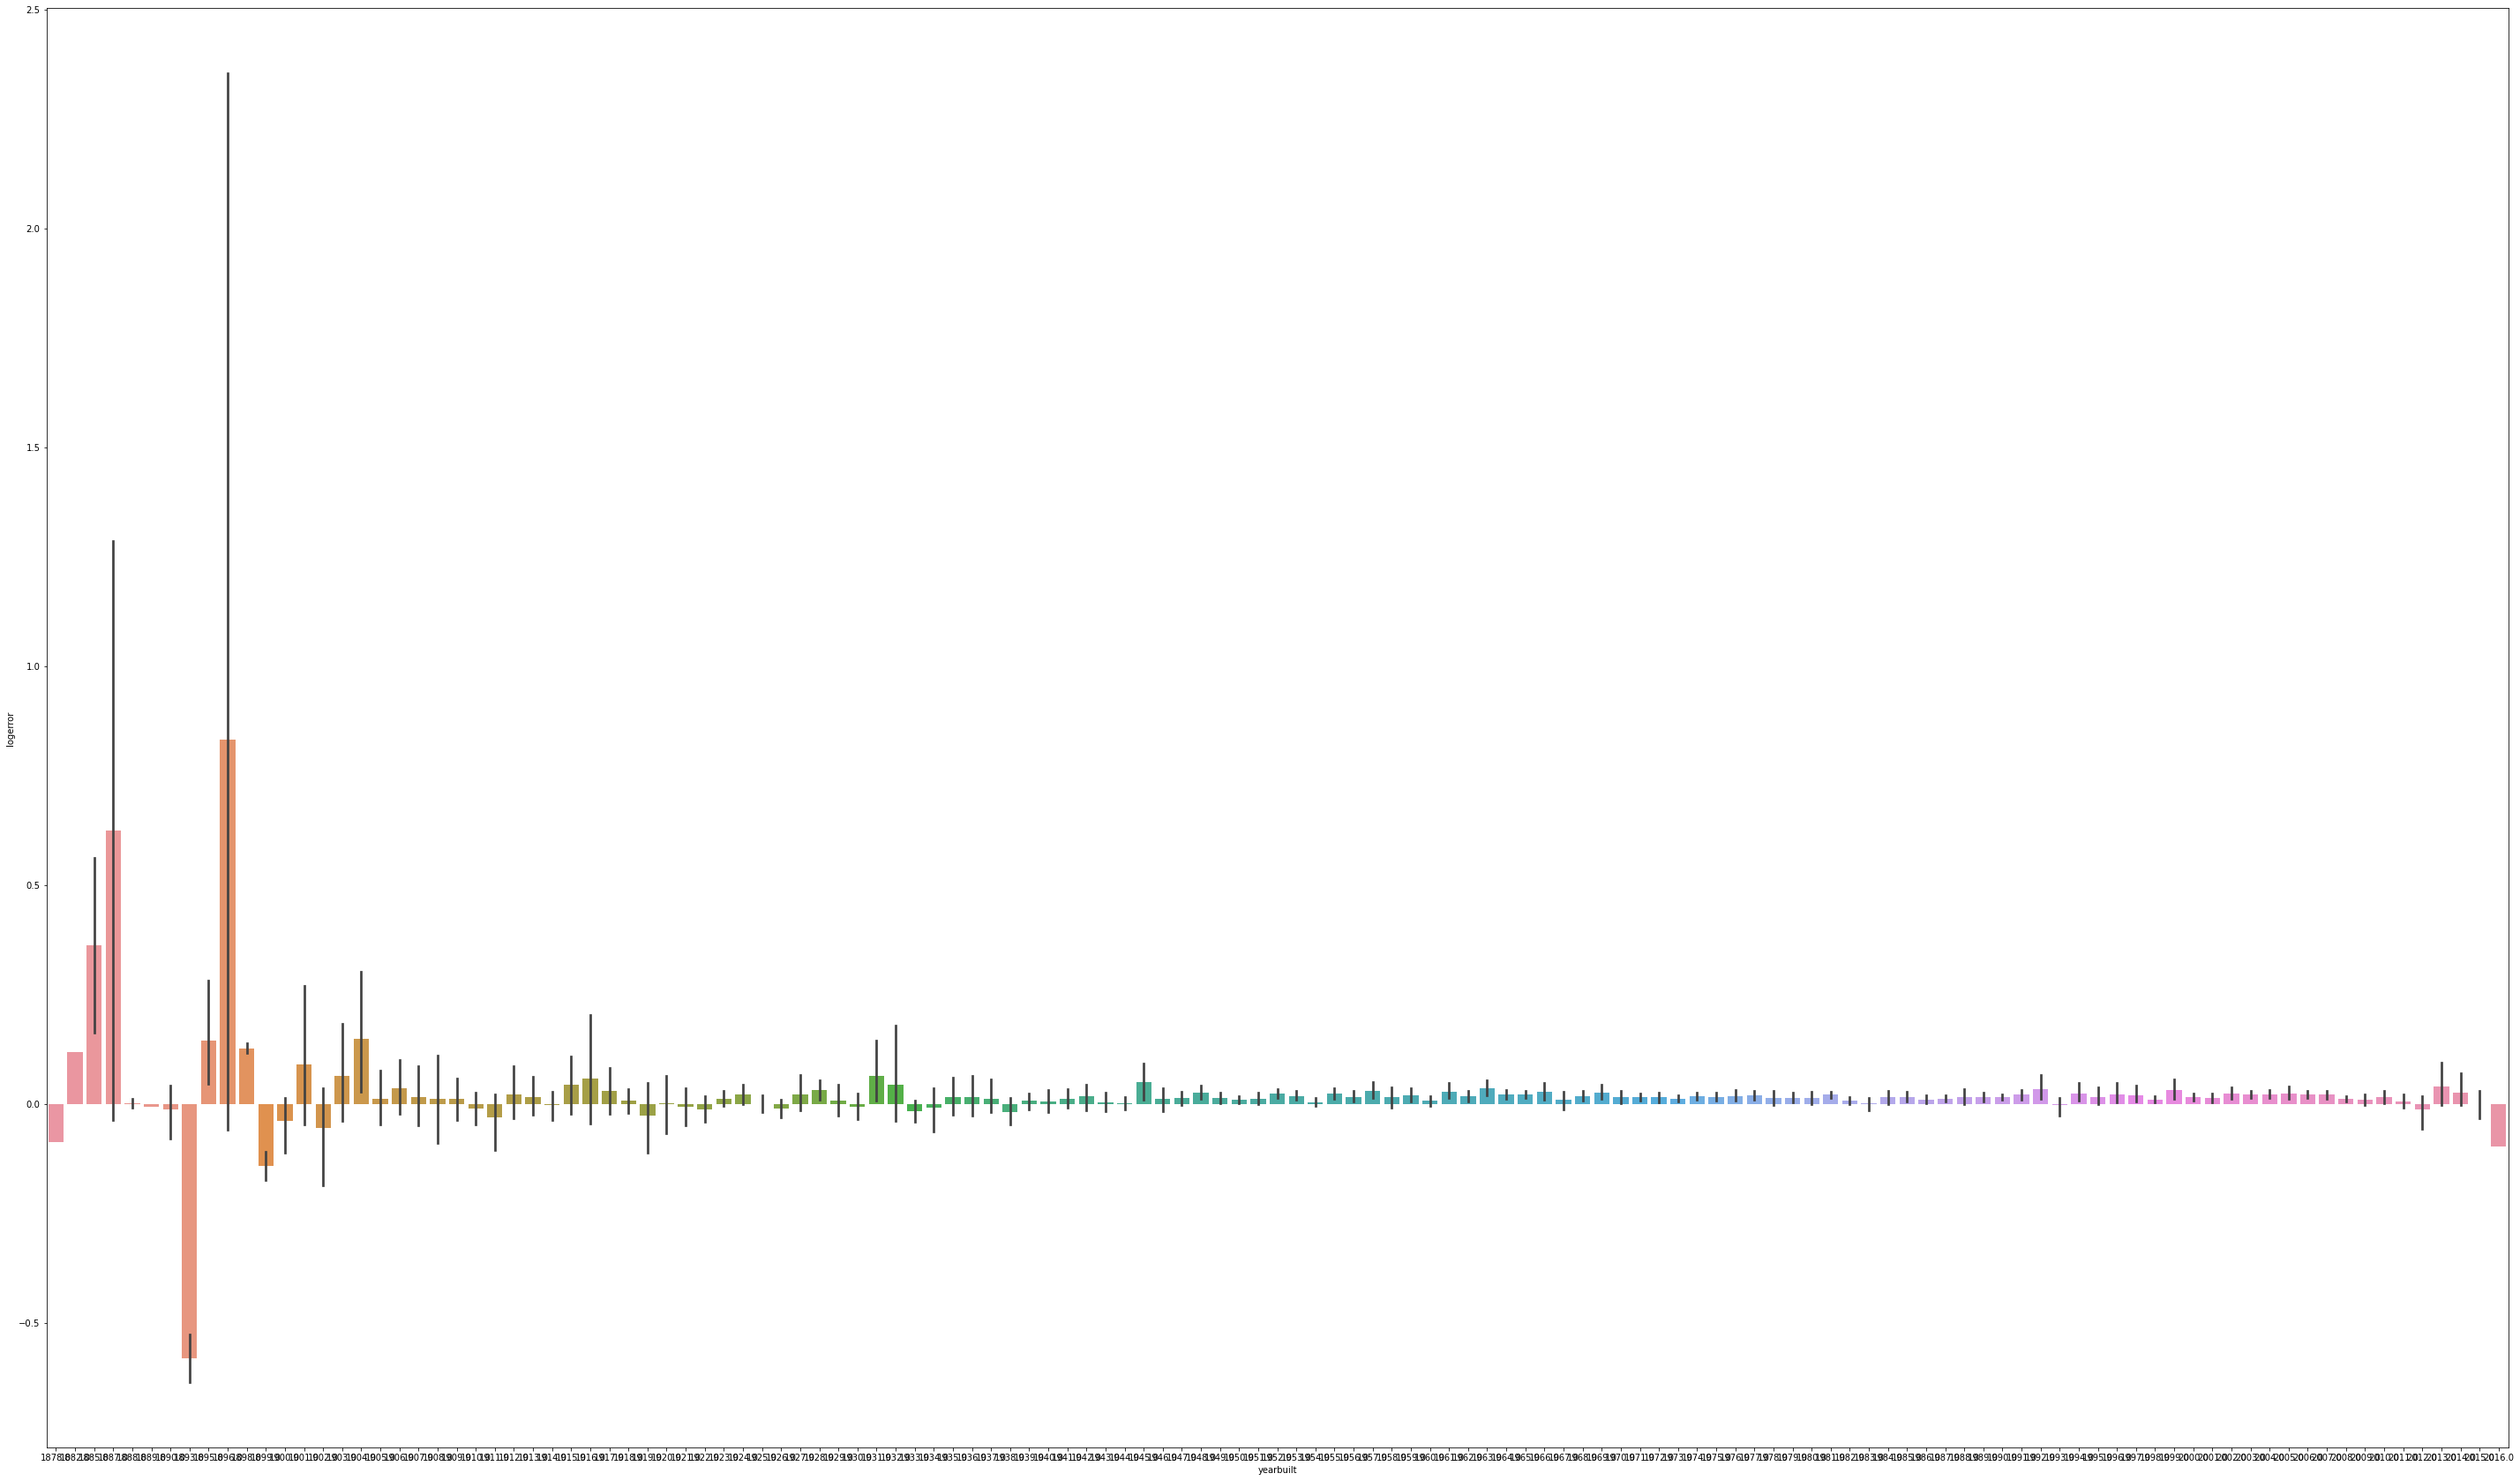

In [20]:
plt.figure(figsize=(50,30))
sns.barplot(x='yearbuilt', y='logerror', data=train)

#### Takeaways
- 
- 


In [21]:
train['years'] = pd.qcut(train.yearbuilt, q=3, labels = ['q1', 'q2', 'q3'])

<AxesSubplot:xlabel='years', ylabel='logerror'>

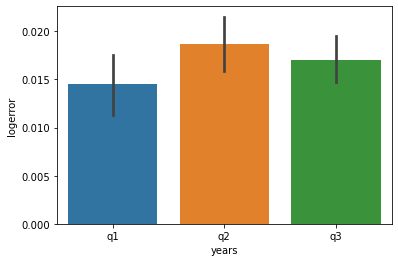

In [22]:
sns.barplot(x='years', y='logerror', data=train)

#### Takeaways
- 
- 


### Question 5: Does logerror differ across yearbuilt? 

In [24]:
train.yearbuilt.min(), train.yearbuilt.max()

(1878.0, 2016.0)

In [25]:
train.yearbuilt.median()

1970.0

<AxesSubplot:>

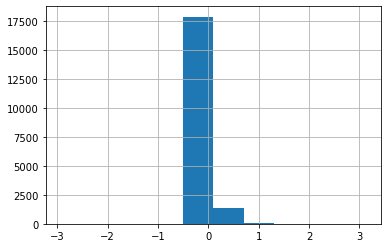

In [30]:
after_1970 = train[train.yearbuilt > 1970.0].logerror
after_1970.hist()

<AxesSubplot:>

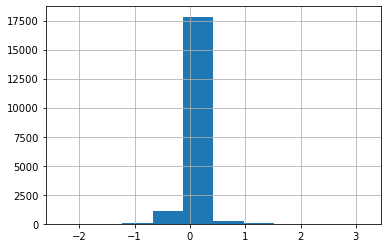

In [31]:
before_1970 = train[train.yearbuilt < 1970.0].logerror
before_1970.hist()

In [27]:
#T-test: logerror and yearbuilt
null_hypothesis = "there is no difference in logerror between homes built after 1970 vs homes built before 1970."
alternative_hypothesis = "there is a difference in logerror between homes built after 1970 vs homes built before 1970."
confidence_level = .95
alpha = 1 - confidence_level

after_1970 = train[train.yearbuilt > 1970.0].logerror
before_1970 = train[train.yearbuilt < 1970.0].logerror

t, p = stats.ttest_ind(after_1970, before_1970)


if p < alpha:
    print("We reject the null hypothesis.")
    print("We can move forward with the alternative hypothesis: ", alternative_hypothesis)

else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

We fail to reject the null hypothesis
Not enough evidence to support there is a difference in logerror between homes built after 1970 vs homes built before 1970.


#### Takeaways
- 
- 


### Bonus: Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.